In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from datetime import datetime
from shapely.geometry import Point
from geopandas.tools import geocode
from geopandas.tools import reverse_geocode
%matplotlib inline

In [4]:
# load data into dataframe:
location = "datasets/hurricaneMichael.csv"
michael_df = pd.read_csv(location)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [5]:
# check if any missing value:
michael_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [7]:
# covert longtitude data to negative value:
michael_df['Long'] = 0 -michael_df['Long']
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [9]:
# make a new column to hold the longtitude and latitude as a list:
michael_df['coordinates'] = list(michael_df[["Long","Lat"]].values)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [12]:
# covert the coordinates to a geolocation type:
michael_df['coordinates'] = michael_df['coordinates'].apply(Point)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [14]:
# create a geolocation dataframe type using the coordinates column as the geolocation data:
geo_michael= gpd.GeoDataFrame(michael_df, geometry = "coordinates")

In [15]:
# verify coordinates column in geolocation data type:
type(geo_michael['coordinates'])

geopandas.geoseries.GeoSeries

In [16]:
# import file that contains a world map shap polygons:
filepath = "datasets/US_states(5m).json"
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [18]:
# crate a geodataframe that only contains the contiguous United States (48 states):
map48 = map_df.loc[map_df['NAME'].isin(['Alaska',"Hawaii","Puerto Rico"])==False]

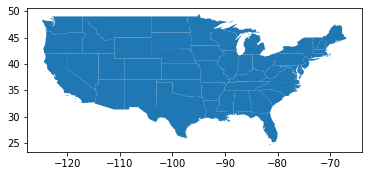

In [19]:
# map graph:
map48.plot()

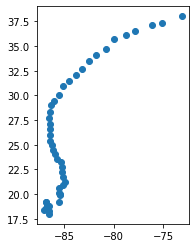

In [20]:
# plot the coordinates (no map)
geo_michael.plot()

Text(0.5, 1, 'Hurricane Michael Path')

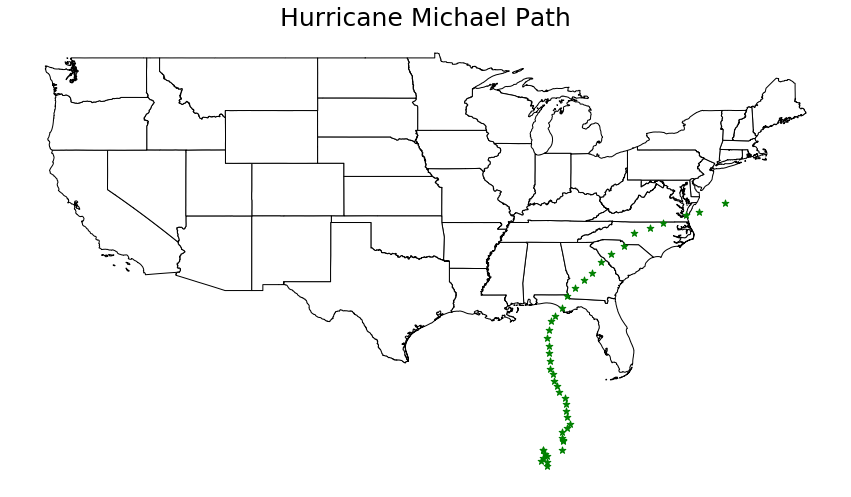

In [31]:
# plot coordinates on the top of map graph:

# set the size of the borders:
fig, ax = plt.subplots(1, figsize = (15,10))

# this is the map:
basemap = map48.plot(ax=ax, color = "white", edgecolor = "black")

#plot coordinates on top of map graph:
geo_michael.plot(ax = basemap, color = "green", marker = "*", markersize = 50)

# take off axis numbers:
ax.axis('off')

#put the tille on map:
ax.set_title("Hurricane Michael Path", fontsize = 25, fontweight = 3)